In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
##Importing Data
path = r'C:\Users\turne\Instacart Basket Analysis'

In [3]:
#Import ords_prods_all dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## Table of contents
#### 1. PII(personally identifiable information) issue
#### 2. Regional analysis
#### 3. Activity Customer flag
#### 4. Customer profile
#### 5. Customer profile and department
#### 6. Distributions by profiles
#### 7. Customer profile and expenditure
#### 8. Customer profile with regions and department
#### 9. Exporting dataframe for Excel/Tableau

### 1. PII
This dataframe contains personal information such as names, emails, gender, familial status, dependents & income

### 2. Regional analysis
Create a regional segmentation of the data and Determine whether there’s a difference in spending habits between the different U.S. regions.

In [4]:
# Check output - view current column headers
df_ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,reordered,First Name,Last Name,Gender,State,Age,Number_of_Dependants,Familial_Status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0,Charles,Cox,Male,Minnesota,81,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,Charles,Cox,Male,Minnesota,81,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,0,Charles,Cox,Male,Minnesota,81,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,1,Charles,Cox,Male,Minnesota,81,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,0,Charles,Cox,Male,Minnesota,81,1,married,49620,both


In [5]:
# Check data type for all columns
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 23 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                object  
 6   user_id                 object  
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  first_order             bool    
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  First Name              object  
 15  Last Name               object  
 16  Gender                  object  
 17  State                   object  
 18  Age                     int64   
 19  Number_of_Dependants    int64   
 20  Familial_Status         object  
 21  income

In [6]:
# Change the data type of the order_id df to string and override as new type
df_ords_prods_all['order_id'] = df_ords_prods_all['order_id'].astype('str')

In [7]:
# Verify shape after all consistency and quality checks
df_ords_prods_all.shape

(32434212, 23)

In [8]:
## Crosstabs in Python
# Create a crosstab to check whether the assumption is true that orders without any \"days since prior order\" are because the line item is for the customer's first order
crosstab = pd.crosstab(df_ords_prods_all['days_since_prior_order'], df_ords_prods_all['order_number'], dropna = False)

In [9]:
crosstab.to_clipboard()

#### Creating Regions by creating region function to populate with what region the customer is in by state

In [10]:
result = []

for value in df_ords_prods_all['State']:
    if value in ('Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        result.append('South')
    elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')

# Source for Regional Categorization - Wikipedia

https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [11]:
# Check result of for-loop

result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [12]:
# Populate regions into new 'Region' column

df_ords_prods_all['Region'] = result

In [13]:
# Check count on each value in new 'Region' column - ensure all states were categorized and no 'Unknown' values

df_ords_prods_all['Region'].value_counts(dropna = False)

Region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [14]:
# Verify all Region information after transitioning to new column
df_ords_prods_all.shape

(32434212, 24)

## All states confirmed into correct Regions.  Total count within each region adds up to 32,434,212 rows.

In [15]:
# Import ords_prods_merge
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [16]:
## Create Loyalty Flag column
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_ords_prods_merge.loc[(df_ords_prods_merge['max_order'] <= 40) & (df_ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [17]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 24 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                object  
 6   user_id                 object  
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  first_order             bool    
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  First Name              object  
 15  Last Name               object  
 16  Gender                  object  
 17  State                   object  
 18  Age                     int64   
 19  Number_of_Dependants    int64   
 20  Familial_Status         object  
 21  income

In [18]:
df_ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 25 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  first_order             bool    
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  _merge                  category
 15  price_range_loc         object  
 16  Busiest day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  average

In [19]:
df_ords_prods_merge.shape

(10000000, 25)

In [20]:
df_ords_prods_merge[['user_id', 'loyalty_flag', 'busiest_days']].head(20)

,user_id,loyalty_flag,busiest_days
0,138,Regular customer,Regularly Busy Days
1,138,Regular customer,Regularly Busy Days
2,709,New customer,Busiest Days
3,764,New customer,Slowest Days
4,764,New customer,Slowest Days
5,777,Regular customer,Busiest Days
6,825,New customer,Regularly Busy Days
7,910,Regular customer,Slowest Days
8,1052,Regular customer,Busiest Days
9,1052,Regular customer,Busiest Days


In [21]:
df_ords_prods_all['average spent']= df_ords_prods_all.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\turne\AppData\Local\Temp\ipykernel_12928\2415006281.py:1: FutureWarning: The provided callable <function mean at 0x00000276C85428E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ords_prods_all['average spent']= df_ords_prods_all.groupby(['user_id'])['prices'].transform(np.mean)


In [22]:
df_ords_prods_all.loc[df_ords_prods_all['average spent']>=10,'spending flag']='High spender'
df_ords_prods_all.loc[df_ords_prods_all['average spent']<10,'spending flag']='Low spender'

In [23]:
pd.options.display.max_rows=None

In [24]:
df_ords_prods_all[['user_id','prices','average spent','spending flag']].head(100)

,user_id,prices,average spent,spending flag
0,138,5.8,6.935811,Low spender
1,138,5.8,6.935811,Low spender
2,138,20.0,6.935811,Low spender
3,138,20.0,6.935811,Low spender
4,138,12.9,6.935811,Low spender
5,138,1.7,6.935811,Low spender
6,138,4.4,6.935811,Low spender
7,138,4.3,6.935811,Low spender
8,138,2.9,6.935811,Low spender
9,138,9.0,6.935811,Low spender


In [25]:
crosstab = pd.crosstab(df_ords_prods_all['days_since_prior_order'], df_ords_prods_all['order_number'], dropna = False)

In [26]:
# Create a crosstab to act as a pivot for analysis

pivot_average_spending = pd.crosstab(df_ords_prods_all['average spent'], df_ords_prods_all['spending flag'], dropna = False)

In [27]:
pivot_average_spending.to_clipboard()

### 3. Activity Customer flag

In [28]:
# Create the low activity flag

df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] >= 5, 'exclusion_flag'] = 'Include'
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [29]:
# Check the counts of each flag

df_ords_prods_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    9551563
Exclude     448437
Name: count, dtype: int64

In [30]:
9551563 + 448437

10000000

## Verified the correct count of random rows.  10,000,000 rows **Recalling on my previous assignment that I could only save approximately 30% of my data due to RAM errors

In [31]:
# Verify that the results are expected

df_ords_prods_merge[['max_order', 'exclusion_flag']].head()

,max_order,exclusion_flag
0,32,Include
1,32,Include
2,5,Include
3,3,Exclude
4,3,Exclude


In [32]:
df_ords_prods_merge[['max_order', 'exclusion_flag']].tail()

,max_order,exclusion_flag
9999995,32,Include
9999996,32,Include
9999997,4,Exclude
9999998,4,Exclude
9999999,45,Include


In [33]:
# Create subset df of all rows to exclude (customers who have ordered < 5 times)

df_ords_prods_merge_exclude = df_ords_prods_merge[df_ords_prods_merge['exclusion_flag'] == 'Exclude']

In [34]:
# Check shape of subset df

df_ords_prods_merge_exclude.shape

(448437, 26)

In [35]:
# Export the subset df for records as pickle file to Prepared Data folder

df_ords_prods_merge_exclude.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_exclusions.pkl'))

In [36]:
# Remove exclusions from primary dataframe (create new filtered df with only \"include\" rows)

df_ords_prods_merge_include = df_ords_prods_merge[df_ords_prods_merge['exclusion_flag'] == 'Include']

In [37]:
# Check shape of subset df

df_ords_prods_merge_include.shape

(9551563, 26)

In [38]:
448437 + 9551563

10000000

## Verified the correct amount of included and excluded customers - Indicating all records have successfully been separated into included & excluded df

In [39]:
# Export new merged dataframe as pickle file to Prepared Data folder

df_ords_prods_merge_include.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_include.pkl'))

### 4. Customer profile

In [40]:
# Import dep_id_new data file from Exercise 4.4 - department_id matches the name of the department

df_dep_id_new = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [41]:
# Change the data type of the user_id column in customer df to string and override as new type

df_ords_prods_merge_include['order_id'] = df_ords_prods_merge_include['order_id'].astype('str')

C:\Users\turne\AppData\Local\Temp\ipykernel_12928\1906513228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_merge_include['order_id'] = df_ords_prods_merge_include['order_id'].astype('str')


In [42]:
# Check to ensure data type change has occurred

df_ords_prods_merge_include['order_id'].dtype

dtype('O')

In [43]:
# Change the data type of the department_id column in customer df to string and override as new type

df_ords_prods_merge_include['department_id'] = df_ords_prods_merge_include['department_id'].astype('str')

C:\Users\turne\AppData\Local\Temp\ipykernel_12928\4242301009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_merge_include['department_id'] = df_ords_prods_merge_include['department_id'].astype('str')


In [44]:
# Check to ensure data type change has occurred

df_ords_prods_merge_include['department_id'].dtype

dtype('O')

In [45]:
# Remove _merge column 

df_ords_prods_merge_include = df_ords_prods_merge_include.drop(columns = ['_merge'])

In [46]:
df_ords_prods_merge_include.shape

(9551563, 25)

In [47]:
# Check dimensions of department df - should have 21 rows and 2 columns

df_dep_id_new.shape

(21, 2)

## Results are correct as there are 21 rows & 2 columns

In [48]:
# Check output - view current column headers and data type

df_dep_id_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [49]:
# Change the data type of the department_id column in customer df to string and override as new type

df_dep_id_new['department'] = df_dep_id_new['department'].astype('str')

In [50]:
# Check to ensure data type change has occurred

df_dep_id_new['department'].dtype

dtype('O')

In [51]:
# Change "department" column name to "department_id"
df_dep_id_new.rename(columns = {'department_id' : 'department'}, inplace = True)

### 5. Customer profile and department

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [52]:
### Categorize Customer by Age
### Check distribution of ages

df_ords_prods_all.agg({'Age': ['mean', 'min', 'max']})

,Age
mean,49.465207
min,18.000000
max,81.000000


In [53]:
### Create a function to categorize customers by age - Age Groups (child, young adult, adult, elder)

df_ords_prods_all.loc[df_ords_prods_all['Age'] >= 65, 'Age_Group'] = 'Elder'
df_ords_prods_all.loc[(df_ords_prods_all['Age'] < 65) & (df_ords_prods_all['Age'] >= 25), 'Age_Group'] = 'Adult'
df_ords_prods_all.loc[(df_ords_prods_all['Age'] < 25) & (df_ords_prods_all['Age'] >= 18), 'Age_Group'] = 'Young Adult'
df_ords_prods_all.loc[df_ords_prods_all['Age'] < 18, 'Age_Group'] = 'Child'

In [54]:
# Check the counts of each flag

df_ords_prods_all['Age_Group'].value_counts(dropna = False)

Age_Group
Adult          20275297
Elder           8582637
Young Adult     3576278
Name: count, dtype: int64

In [55]:
pd.options.display.max_rows = None

In [56]:
# Verify that the categorization results are expected

df_ords_prods_all[['Age', 'Age_Group']].tail(50)

,Age,Age_Group
32434162,69,Elder
32434163,69,Elder
32434164,32,Adult
32434165,32,Adult
32434166,32,Adult
32434167,64,Adult
32434168,64,Adult
32434169,64,Adult
32434170,41,Adult
32434171,41,Adult


#### Categorization of age groups are correct. There is no count for the "child" age group. 

### Categorize Customer by Income

In [57]:
### Check distribution of income

df_ords_prods_all.agg({'income': ['mean', 'min', 'max']})

,income
mean,99435.246393
min,25903.000000
max,593901.000000


In [58]:
# Calculate average income range as one standard deviation above and below mean

bottom_avg_inc = df_ords_prods_all['income'].mean() - df_ords_prods_all['income'].std()
top_avg_inc = df_ords_prods_all['income'].mean() + df_ords_prods_all['income'].std()

In [59]:
print(bottom_avg_inc)

56380.51378685929


In [60]:
print(top_avg_inc)

142489.97899822827


In [61]:
# Create a function to categorize customers by income level - Income Levels (below average, average, above average)

df_ords_prods_all.loc[df_ords_prods_all['income'] >= 142818, 'Income_Level'] = 'Above Avg Income'
df_ords_prods_all.loc[(df_ords_prods_all['income'] < 142818) & (df_ords_prods_all['income'] >= 56534), 'Income_Level'] = 'Avg Income'
df_ords_prods_all.loc[df_ords_prods_all['income'] < 56534, 'Income_Level'] = 'Below Avg Income'

In [62]:
# Check the counts of each flag

df_ords_prods_all['Income_Level'].value_counts(dropna = False)

Income_Level
Avg Income          21863416
Above Avg Income     5390167
Below Avg Income     5180629
Name: count, dtype: int64

In [63]:
21863416+5390167+5180629

32434212

### All values are verified.

In [64]:
# Verify that the categorization results are expected

df_ords_prods_all[['income', 'Income_Level']].tail(40)

,income,Income_Level
32434172,107071,Avg Income
32434173,41389,Below Avg Income
32434174,41389,Below Avg Income
32434175,41389,Below Avg Income
32434176,41389,Below Avg Income
32434177,41766,Below Avg Income
32434178,41766,Below Avg Income
32434179,41766,Below Avg Income
32434180,40532,Below Avg Income
32434181,40532,Below Avg Income


#### Categorization of income level are correct.

### Categorize Customer by Household Type (Children or No children)

In [65]:
# Create a function to flag customers by household type (kids or no kids)

df_ords_prods_all.loc[df_ords_prods_all['Number_of_Dependants'] > 0, 'Household_Type'] = 'Has Children'
df_ords_prods_all.loc[df_ords_prods_all['Number_of_Dependants'] <= 0, 'Household_Type'] = 'No Children'

In [66]:
# Check the counts of each flag

df_ords_prods_all['Household_Type'].value_counts(dropna = False)

Household_Type
Has Children    24329015
No Children      8105197
Name: count, dtype: int64

In [67]:
24329015+8105197

32434212

In [68]:
# Verify that the categorization results are expected

df_ords_prods_all[['Number_of_Dependants', 'Household_Type']].tail(50)

,Number_of_Dependants,Household_Type
32434162,0,No Children
32434163,0,No Children
32434164,3,Has Children
32434165,3,Has Children
32434166,3,Has Children
32434167,0,No Children
32434168,0,No Children
32434169,0,No Children
32434170,3,Has Children
32434171,3,Has Children


#### Categorization of household type worked.

In [69]:
# View all columns in updated df

for col in df_ords_prods_all.columns:
    print(col)

product_id
product_name
aisle_id
department_id
prices
order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
first_order
add_to_cart_order
reordered
First Name
Last Name
Gender
State
Age
Number_of_Dependants
Familial_Status
income
_merge
Region
average spent
spending flag
Age_Group
Income_Level
Household_Type


### Creating Profiles

#### Profile Creation for Lifestyle, Income, and Household Type

Reminder: Lifestyle pulls from Familial Status where Married is Married. We assume all other statuses (single, divorced/widowed, living with parents and siblings) are considered Single. 

In [70]:
# Create a profile tag for Single Adults, Below Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Below Avg Income Household w/Kids'

In [71]:
# Create a profile tag for Single Adults Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Avg Income Household w/Kids'

In [72]:
# Create a profile tag for Single Adults Above Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Above Avg Income Household w/Kids'

In [73]:
# Create a profile tag for Single Adults Below Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Below Avg Income Household w/o Kids'

In [74]:
# Create a profile tag for Single Adults Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Avg Income Household w/o Kids'

In [75]:
# Create a profile tag for Single Adults Above Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] != 'married') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single Above Avg Income Household w/o Kids'

In [76]:
# Create a profile tag for Married Below Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Below Avg Income Household w/Kids'

In [77]:
# Create a profile tag for Married Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Avg Income Household w/Kids'

In [78]:
# Create a profile tag for Married Above Avg Income Household w/Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income') & (df_ords_prods_all['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Above Avg Income Household w/Kids'

In [79]:
# Create a profile tag for Married Below Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Below Avg Income Household w/o Kids'

In [80]:
# Create a profile tag for Married Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Avg Income Household w/o Kids'

In [81]:
# Create a profile tag for Married Above Avg Income Household w/o Kids

df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income') & (df_ords_prods_all['Household_Type'] == 'No Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Above Avg Income Household w/o Kids'

In [82]:
# Check the counts of each flag

df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'].value_counts(dropna = False)

Customer_Profile_Lifestyle_Income_Household
Married Avg Income Household w/Kids           15283758
Single Avg Income Household w/o Kids           5443080
Married Above Avg Income Household w/Kids      4006036
Married Below Avg Income Household w/Kids      3487119
Single Above Avg Income Household w/o Kids     1368017
Single Below Avg Income Household w/o Kids     1294100
Single Avg Income Household w/Kids             1136578
Single Below Avg Income Household w/Kids        399410
Single Above Avg Income Household w/Kids         16114
Name: count, dtype: int64

In [83]:
15283758+5443080+4006036+3487119+1368017+1294100+1136578+399410+16114

32434212

#### Verified all flag profiles total up to 32434212

### Profile Creation for Age and Income

In [84]:
# Create a profile tag for Young Adult w/Below Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Young Adult') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Below Avg Income'

In [85]:
# Create a profile tag for Young Adult w/Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Young Adult') & (df_ords_prods_all['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Avg Income'

In [86]:
# Create a profile tag for Young Adult w/Above Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Young Adult') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Above Avg Income'

In [87]:
# Create a profile tag for Adult w/Below Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Adult') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Below Avg Income'

In [88]:
# Create a profile tag for Adult w/Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Adult') & (df_ords_prods_all['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Avg Income'

In [89]:
# Create a profile tag for Adult w/Above Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Adult') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Above Avg Income'

In [90]:
# Create a profile tag for Elder Person w/Below Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Elder') & (df_ords_prods_all['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Below Avg Income'

In [91]:
# Create a profile tag for Elder Person w/Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Elder') & (df_ords_prods_all['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Avg Income'

In [92]:
# Create a profile tag for Elder Person w/Above Avg Income

df_ords_prods_all.loc[(df_ords_prods_all['Age_Group'] == 'Elder') & (df_ords_prods_all['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Above Avg Income'

In [93]:
# Check the counts of each flag

df_ords_prods_all['Customer_Profile_Age_Income'].value_counts(dropna = False)

Customer_Profile_Age_Income
Adult w/Avg Income                 13736669
Elder Person w/Avg Income           5510576
Adult w/Below Avg Income            3361786
Adult w/Above Avg Income            3176842
Young Adult w/Avg Income            2616171
Elder Person w/Above Avg Income     2177950
Young Adult w/Below Avg Income       924732
Elder Person w/Below Avg Income      894111
Young Adult w/Above Avg Income        35375
Name: count, dtype: int64

#### Verified all flag profiles total up to 32434212

### Step 6 Distributions by profiles- Create an appropriate visualization to show the distribution of profiles.

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Distribution')]

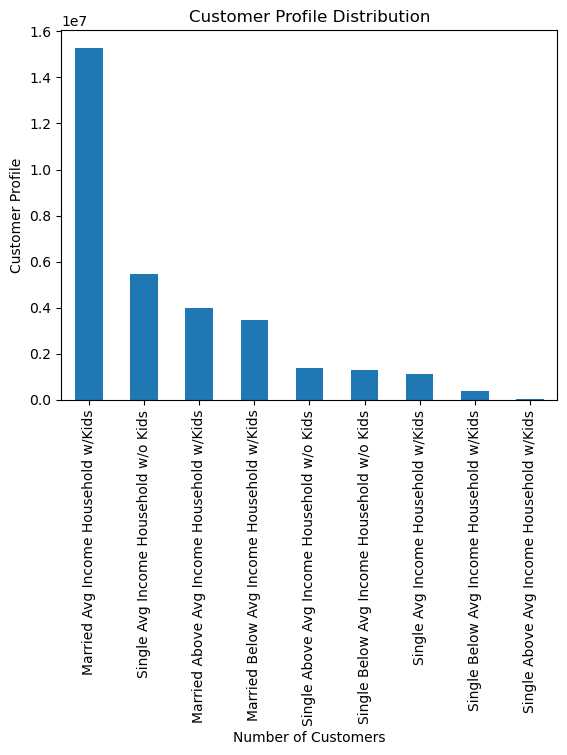

In [94]:
# Create a bar chart showing how many people are in each Lifestyle/Income/Household profile

bar_profiles_LIH = df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'].value_counts().plot.bar()

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Distribution')

In [95]:
# Export the bar chart

bar_profiles_LIH.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_LIH.png'), bbox_inches = 'tight')

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Distribution')]

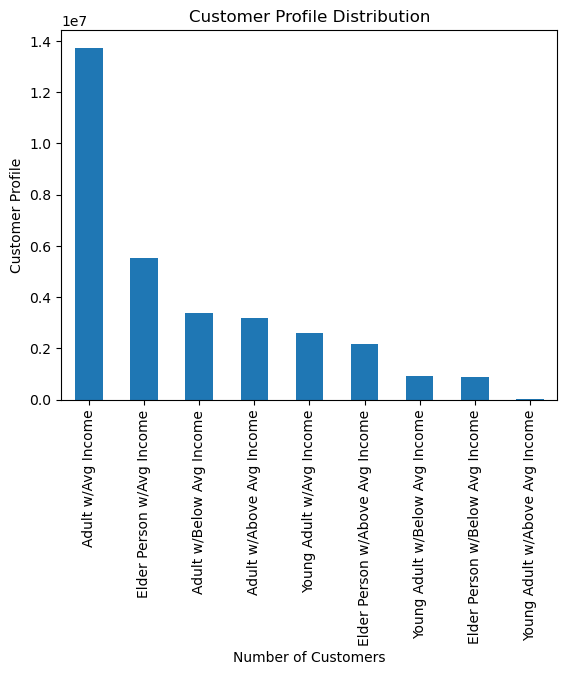

In [97]:
# Create a bar chart showing how many people are in each Age/Income profile

bar_profiles_AI = df_ords_prods_all['Customer_Profile_Age_Income'].value_counts().plot.bar()

# Add labels and a title

bar_profiles_AI.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Distribution')

In [98]:
# Export the bar chart

bar_profiles_AI.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_AI.png'), bbox_inches = 'tight')

### 7. Customer profile and expenditure

In [99]:
# Aggregate the mean, min, max stats for the Lifestyle/Income/Household profiles - for the number of days since the customer's last order for usage frequency and expenditure.

df_ords_prods_all.groupby('Customer_Profile_Lifestyle_Income_Household').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                              mean  min   max
Customer_Profile_Lifestyle_Income_Household                                  
Married Above Avg Income Household w/Kids                11.014440  0.0  30.0
Married Avg Income Household w/Kids                      11.052463  0.0  30.0
Married Below Avg Income Household w/Kids                11.517079  0.0  30.0
Single Above Avg Income Household w/Kids                  9.103133  0.0  30.0
Single Above Avg Income Household w/o Kids               10.902140  0.0  30.0
Single Avg Income Household w/Kids                       10.966530  0.0  30.0
Single Avg Income Household w/o Kids                     11.035606  0.0  30.0
Single Below Avg Income Household w/Kids                 11.361902  0.0  30.0
Single Below Avg Income Household w/o Kids               11.461929  0.0  30.0

In [100]:
# Aggregate the mean, min, max for the Lifestyle/Income/Household profiles - for product price to show expenditure

df_ords_prods_all.groupby('Customer_Profile_Lifestyle_Income_Household').agg({'prices': ['mean', 'min', 'max']})

prices              
                                                   mean  min      max
Customer_Profile_Lifestyle_Income_Household                          
Married Above Avg Income Household w/Kids     26.676044  1.0  99999.0
Married Avg Income Household w/Kids            9.320434  1.0  99999.0
Married Below Avg Income Household w/Kids      6.926996  1.0     25.0
Single Above Avg Income Household w/Kids     184.876133  1.0  99999.0
Single Above Avg Income Household w/o Kids    27.151973  1.0  99999.0
Single Avg Income Household w/Kids             9.591815  1.0  99999.0
Single Avg Income Household w/o Kids           9.581281  1.0  99999.0
Single Below Avg Income Household w/Kids       7.335590  1.0     25.0
Single Below Avg Income Household w/o Kids     6.970373  1.0     25.0

In [101]:
# Aggregate the mean, min, max stats for the Age/Income profiles - for the number of days since the customer's last order to show useage frequency

df_ords_prods_all.groupby('Customer_Profile_Age_Income').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                  mean  min   max
Customer_Profile_Age_Income                                      
Adult w/Above Avg Income                     10.991087  0.0  30.0
Adult w/Avg Income                           11.057684  0.0  30.0
Adult w/Below Avg Income                     11.518381  0.0  30.0
Elder Person w/Above Avg Income              10.978595  0.0  30.0
Elder Person w/Avg Income                    11.041952  0.0  30.0
Elder Person w/Below Avg Income              11.557385  0.0  30.0
Young Adult w/Above Avg Income               10.096304  0.0  30.0
Young Adult w/Avg Income                     10.974776  0.0  30.0
Young Adult w/Below Avg Income               11.329510  0.0  30.0

In [102]:
# Aggregate the mean, min, max for the Lifestyle/Income/Household profiles - for product price to show expenditure

df_ords_prods_all.groupby('Customer_Profile_Age_Income').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
Customer_Profile_Age_Income                              
Adult w/Above Avg Income          28.923519  1.0  99999.0
Adult w/Avg Income                 9.299633  1.0  99999.0
Adult w/Below Avg Income           7.000372  1.0     25.0
Elder Person w/Above Avg Income   20.410652  1.0  99999.0
Elder Person w/Avg Income          9.209097  1.0  99999.0
Elder Person w/Below Avg Income    6.505924  1.0     25.0
Young Adult w/Above Avg Income   301.054903  1.0  99999.0
Young Adult w/Avg Income          10.324774  1.0  99999.0
Young Adult w/Below Avg Income     7.304558  1.0     25.0

### 8. Customer profile with regions and department - Can you identify a link between them?

### Lifestyle / Income / Household Profiles vs Region

In [103]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_region = pd.crosstab(df_ords_prods_all['Region'], df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'], dropna = False)

# View results of crosstab creation

pivot_profiles_LIH_region

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single Above Avg Income Household w/Kids,Single Above Avg Income Household w/o Kids,Single Avg Income Household w/Kids,Single Avg Income Household w/o Kids,Single Below Avg Income Household w/Kids,Single Below Avg Income Household w/o Kids
Region,,,,,,,,,
Midwest,956859,3562126,811083,3117,313042,270237,1307024,93431,286891
Northeast,709571,2723517,607078,875,239783,204206,942925,63399,236993
South,1310702,5072506,1184177,8373,455971,384916,1806058,136761,442146
West,1028904,3925609,884781,3749,359221,277219,1387073,105819,328070


In [104]:
pivot_profiles_LIH_region.to_clipboard()

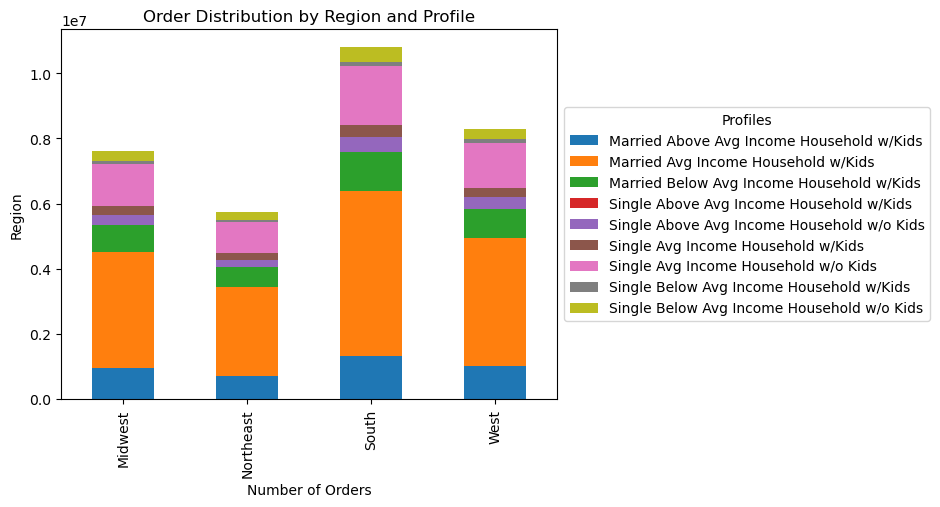

In [105]:
# Create clustered bar chart by region and LIH profile

bar_profiles_LIH_region = pivot_profiles_LIH_region.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_region.set(xlabel='Number of Orders', ylabel='Region', title='Order Distribution by Region and Profile')
bar_profiles_LIH_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [106]:
# Export the bar chart

bar_profiles_LIH_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_LIH_region.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Dept

In [107]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_dept = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'], dropna = False)

# View results of crosstab creation

pivot_profiles_LIH_dept

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single Above Avg Income Household w/Kids,Single Above Avg Income Household w/o Kids,Single Avg Income Household w/Kids,Single Avg Income Household w/o Kids,Single Below Avg Income Household w/Kids,Single Below Avg Income Household w/o Kids
department_id,,,,,,,,,
1,281530,1061147,227561,1612,96575,79034,376834,27964,84175
2,4584,16844,3777,51,1532,1337,6087,523,1556
3,152169,557283,115420,678,50802,41778,202571,13921,42165
4,1174831,4578933,900454,2865,404108,342268,1637918,104495,333419
5,22385,65608,17710,479,7807,6191,24969,2227,6367
6,33967,130299,24200,84,11654,9778,47109,3212,8950
7,319393,1199372,370313,1243,109530,85804,429297,37584,135623
8,12692,45784,9045,78,4827,4018,16176,1524,3580
9,111061,424655,73947,487,37032,31458,150295,9757,27935


In [108]:
pivot_profiles_LIH_dept.to_clipboard()

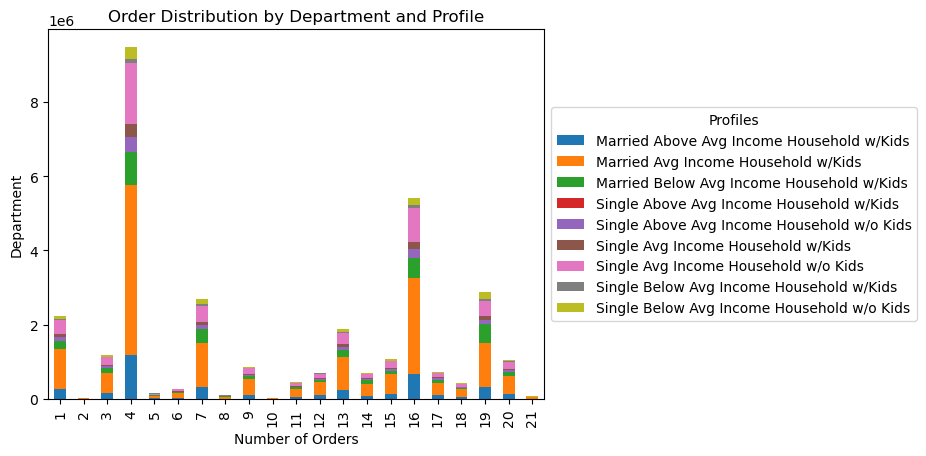

In [109]:
# Create clustered bar chart by department and LIH profile

bar_profiles_LIH_dept = pivot_profiles_LIH_dept.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_dept.set(xlabel='Number of Orders', ylabel='Department', title='Order Distribution by Department and Profile')
bar_profiles_LIH_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [110]:
# Export the bar chart

bar_profiles_LIH_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_LIH_dept.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Reordered

In [111]:
# Create a crosstab to act as a pivot for analysis
 
pivot_profiles_LIH_reorder = pd.crosstab(df_ords_prods_all['reordered'], df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'], dropna = False)\

# View results of crosstab creation

pivot_profiles_LIH_reorder

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single Above Avg Income Household w/Kids,Single Above Avg Income Household w/o Kids,Single Avg Income Household w/Kids,Single Avg Income Household w/o Kids,Single Below Avg Income Household w/Kids,Single Below Avg Income Household w/o Kids
reordered,,,,,,,,,
0,1665775,6305327,1383873,6294,563357,466733,2238567,161655,516541
1,2340261,8978431,2103246,9820,804660,669845,3204513,237755,777559


In [112]:
pivot_profiles_LIH_reorder.to_clipboard()

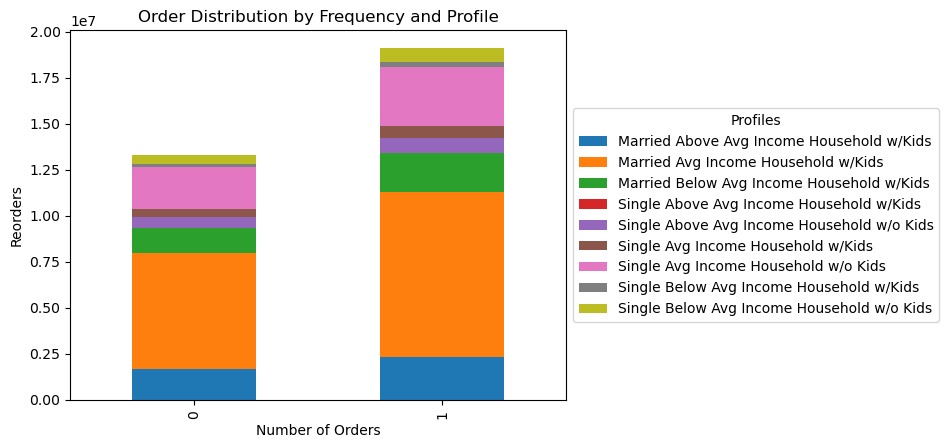

In [113]:
# Create clustered bar chart by reorder flag and LIH profile

bar_profiles_LIH_reorder = pivot_profiles_LIH_reorder.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_reorder.set(xlabel='Number of Orders', ylabel='Reorders', title='Order Distribution by Frequency and Profile')
bar_profiles_LIH_reorder.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [114]:
# Export the bar chart

bar_profiles_LIH_reorder.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_LIH_reorder.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Order Hour of Day

In [115]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_hod = pd.crosstab(df_ords_prods_all['order_hour_of_day'], df_ords_prods_all['Customer_Profile_Lifestyle_Income_Household'], dropna = False)

# View results of crosstab creation

pivot_profiles_LIH_hod

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single Above Avg Income Household w/Kids,Single Above Avg Income Household w/o Kids,Single Avg Income Household w/Kids,Single Avg Income Household w/o Kids,Single Below Avg Income Household w/Kids,Single Below Avg Income Household w/o Kids
order_hour_of_day,,,,,,,,,
0,25991,104715,22962,7,9063,8776,37372,2271,7785
1,13773,55903,11796,29,4482,4498,18969,1424,4912
2,8297,31931,7864,73,3486,2800,10899,881,3200
3,5974,23750,5965,34,2502,1958,8549,611,1974
4,7162,24512,5871,0,2134,2378,8514,614,2098
5,10779,41320,9319,21,4024,3558,14812,979,3245
6,34753,138069,28885,75,12643,11625,50332,3806,10582
7,112245,420167,88380,326,37812,32305,155320,11275,34098
8,215793,810045,183133,593,70452,58157,291030,20253,70496


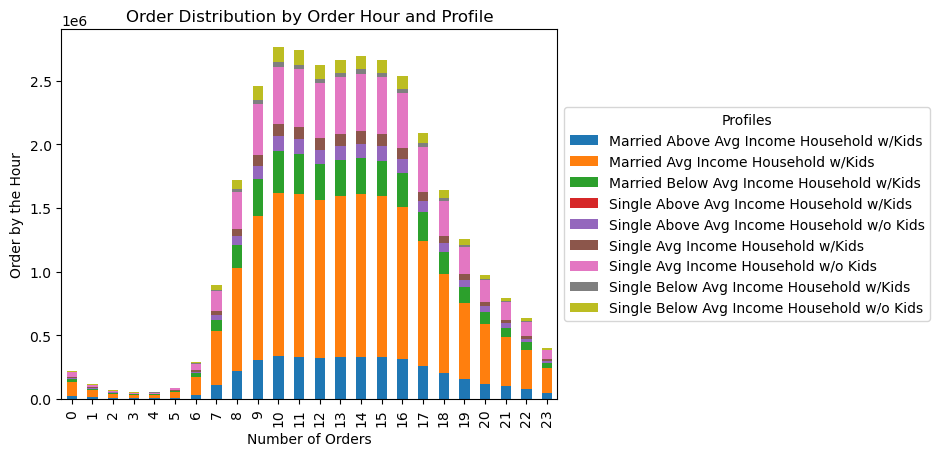

In [116]:
# Create clustered bar chart by Order Hour of Day and LIH profile

bar_profiles_LIH_hod = pivot_profiles_LIH_hod.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_hod.set(xlabel='Number of Orders', ylabel='Order by the Hour', title='Order Distribution by Order Hour and Profile')
bar_profiles_LIH_hod.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [117]:
# Export the bar chart

bar_profiles_LIH_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_LIH_hod.png'), bbox_inches = 'tight')

### Age / Income Profile vs Region

In [118]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_region = pd.crosstab(df_ords_prods_all['Region'], df_ords_prods_all['Customer_Profile_Age_Income'], dropna = False)

# View results of crosstab creation

pivot_profiles_AI_region

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
Region,,,,,,,,,
Midwest,760968,3245003,777162,501810,1290392,200139,10240,603992,214104
Northeast,559667,2396761,585379,386543,1008457,160423,4019,465430,161668
South,1037865,4549476,1156164,723740,1815340,299674,13441,898664,307246
West,818342,3545429,843081,565857,1396387,233875,7675,648085,241714


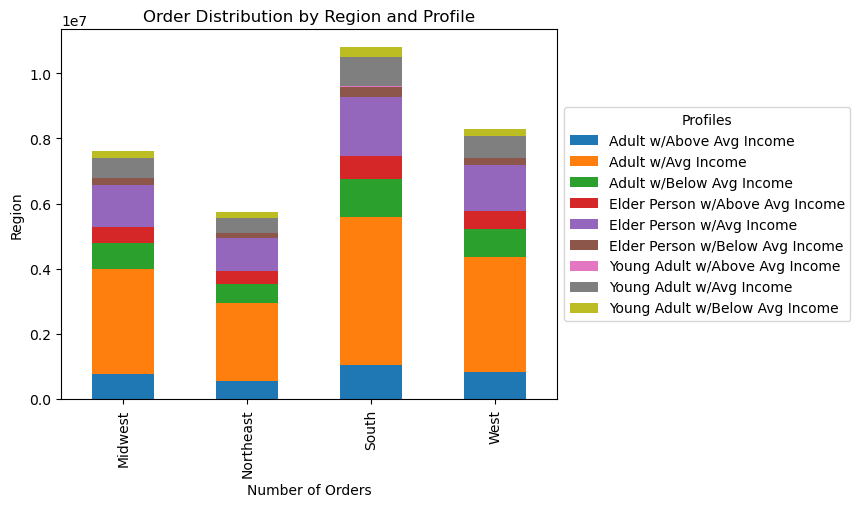

In [119]:
# Create clustered bar chart by region and LIH profile

bar_profiles_AI_region = pivot_profiles_AI_region.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_region.set(xlabel='Number of Orders', ylabel='Region', title='Order Distribution by Region and Profile')
bar_profiles_AI_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [120]:
# Export the bar chart

bar_profiles_AI_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_AI_region.png'), bbox_inches = 'tight')

### Age / Income Profile vs Dept

In [121]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_dept = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['Customer_Profile_Age_Income'], dropna = False)

# View results of crosstab creation

pivot_profiles_AI_dept

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
department_id,,,,,,,,,
1,223682,953057,219046,153011,384017,57048,3024,179941,63606
2,3604,15314,3848,2485,5987,953,78,2967,1055
3,120069,504373,111992,81903,201259,27314,1677,96000,32200
4,931315,4115202,875840,644154,1652345,217264,6335,791572,245264
5,17693,61269,17157,11747,22644,4672,1231,12855,4475
6,27018,117593,23795,18426,47049,5299,261,22544,7268
7,252875,1081643,346794,174236,433250,107354,3055,199580,89372
8,10449,40336,8727,6908,17299,2080,240,8343,3342
9,87691,380213,73137,59851,153244,15840,1038,72951,22662


In [122]:
df_dep_id_new

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


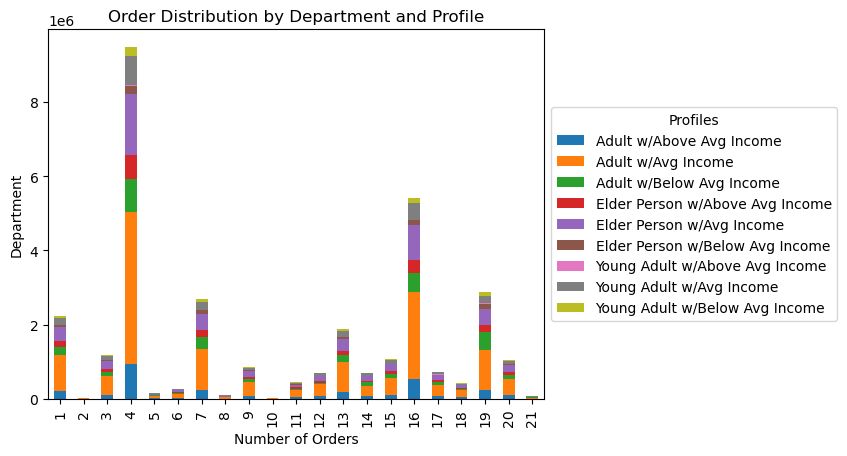

In [123]:
# Create clustered bar chart by region and LIH profile

bar_profiles_AI_dept = pivot_profiles_AI_dept.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_dept.set(xlabel='Number of Orders', ylabel='Department', title='Order Distribution by Department and Profile')
bar_profiles_AI_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [124]:
# Export the bar chart

bar_profiles_AI_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_AI_dept.png'), bbox_inches = 'tight')

### Age / Income Profile vs Average Spent

In [ ]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_ave_spent = pd.crosstab(df_ords_prods_all['average spent'], df_ords_prods_all['Customer_Profile_Age_Income'], dropna = False)

# View results of crosstab creation

pivot_profiles_AI_ave_spent

In [ ]:
# Create clustered bar chart by frequency flag and LIH profile

bar_profiles_AI_ave_spent = pivot_profiles_AI_price.plot.bar(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_price.set(xlabel='Number of Orders', ylabel='Price Range', title='Order Distribution by Price Range and Profile')
bar_profiles_AI_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [ ]:
# Export the bar chart to my files\n",
    "\n",
    "bar_profiles_AI_price.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_price.png'), bbox_inches = 'tight')

In [ ]:
# Check dimensions of final df

df_ords_prods_all.shape

In [126]:
# Export new dataframe as pickle file to Prepared Data folder

df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_include_final.pkl'))